Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None

Missing Values:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

Summary Statistics:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425

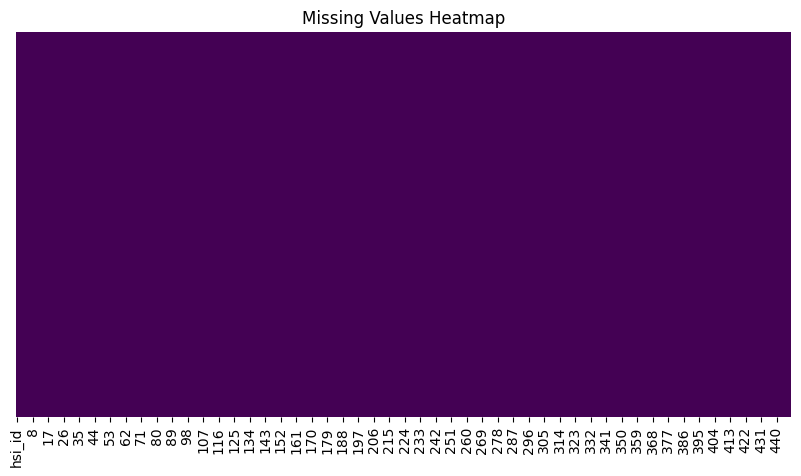

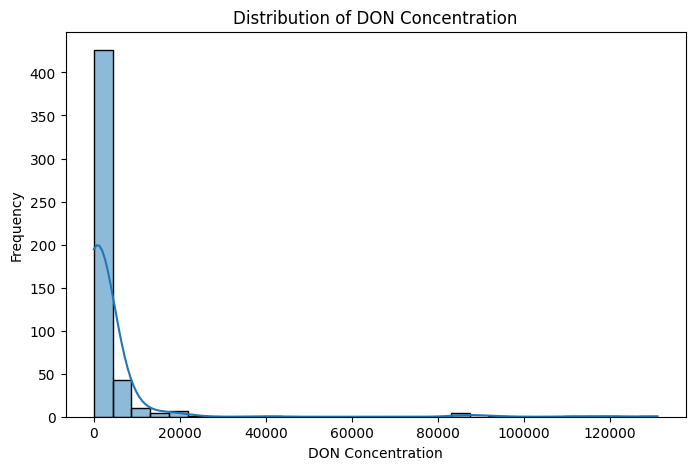

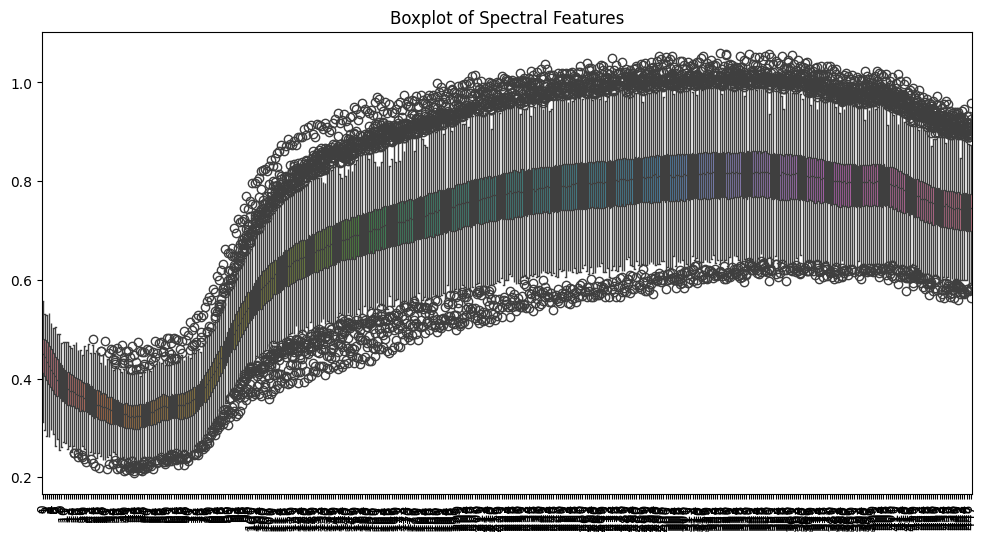

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/Users/srinivaskalyan/Downloads/ImageAI/ImagoAI_Assignment.ipynb"  # Update this with your actual file path
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Distribution of target variable (DON concentration)
plt.figure(figsize=(8, 5))
sns.histplot(df.iloc[:, -1], bins=30, kde=True)
plt.title("Distribution of DON Concentration")
plt.xlabel("DON Concentration")
plt.ylabel("Frequency")
plt.show()

# Boxplot to detect outliers in spectral features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Assuming last column is the target
plt.xticks(rotation=90)
plt.title("Boxplot of Spectral Features")
plt.show()



Data Distribution for column '0':
count    500.000000
mean       0.443118
std        0.044719
min        0.311182
25%        0.410456
50%        0.449105
75%        0.480245
max        0.556287
Name: 0, dtype: float64


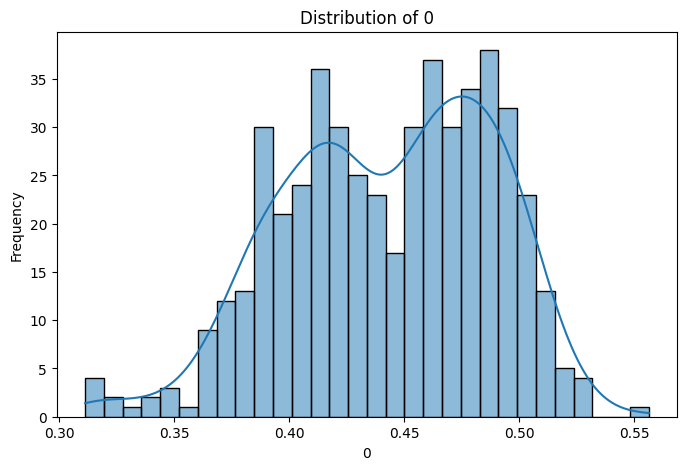

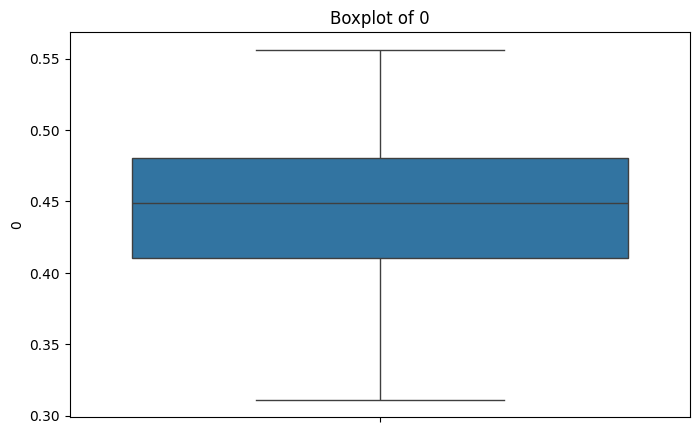


Data Distribution for column '1':
count    500.000000
mean       0.440761
std        0.045520
min        0.295321
25%        0.404310
50%        0.442651
75%        0.478822
max        0.530168
Name: 1, dtype: float64


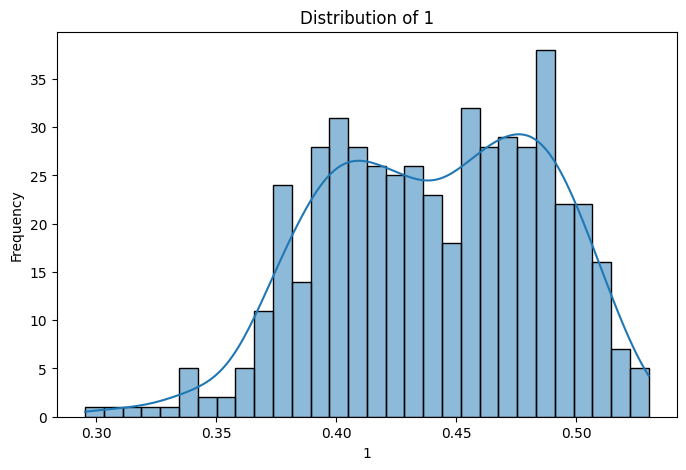

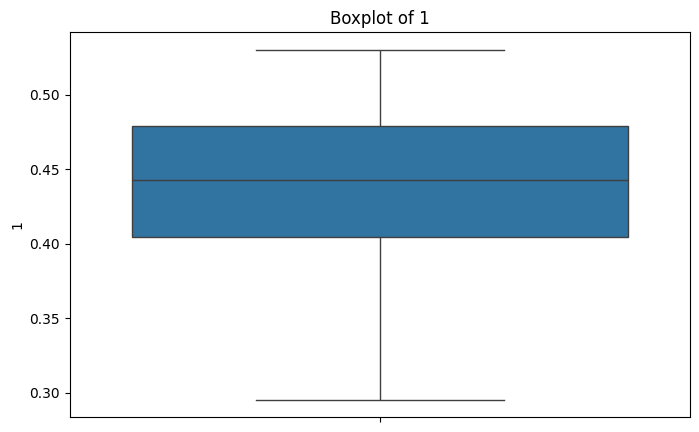


Data Distribution for column '2':
count    500.000000
mean       0.433814
std        0.045764
min        0.284064
25%        0.397038
50%        0.434215
75%        0.473158
max        0.528774
Name: 2, dtype: float64


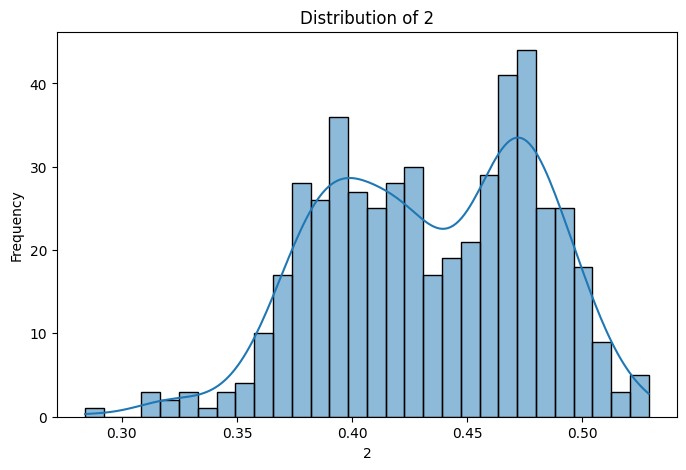

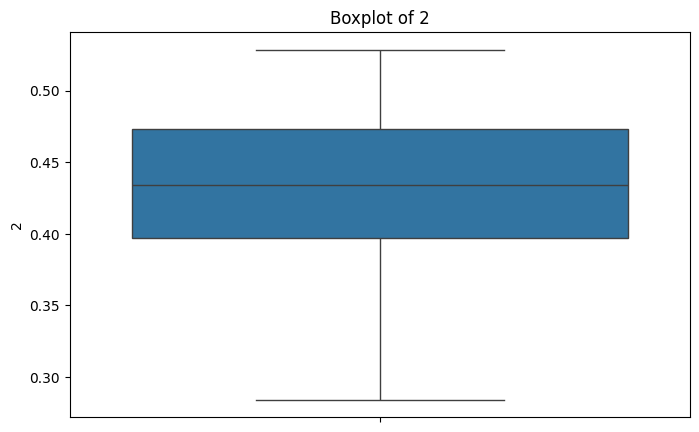


Data Distribution for column '3':
count    500.000000
mean       0.426122
std        0.046070
min        0.282054
25%        0.389029
50%        0.425074
75%        0.464947
max        0.533202
Name: 3, dtype: float64


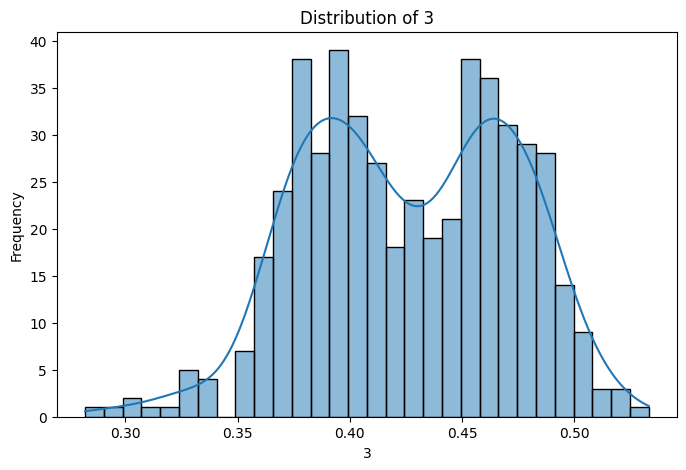

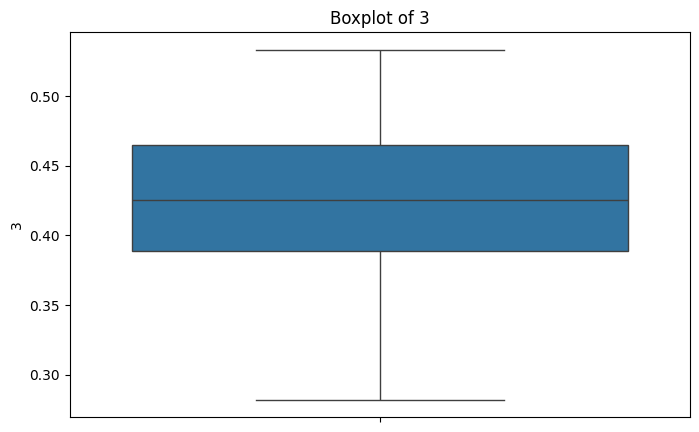


Data Distribution for column '4':
count    500.000000
mean       0.418990
std        0.045405
min        0.296702
25%        0.382102
50%        0.417075
75%        0.459232
max        0.511909
Name: 4, dtype: float64


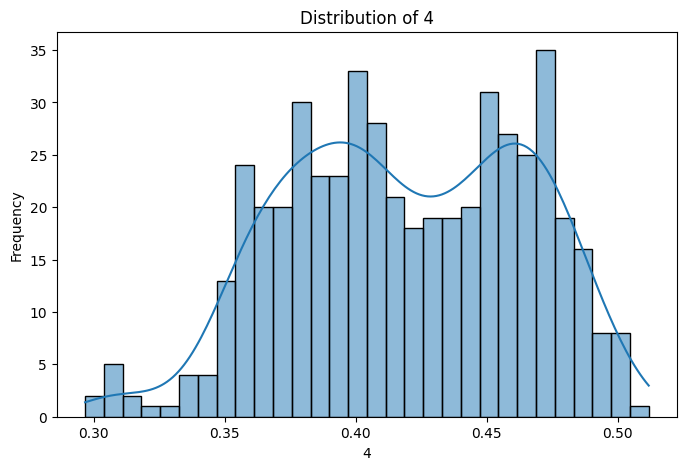

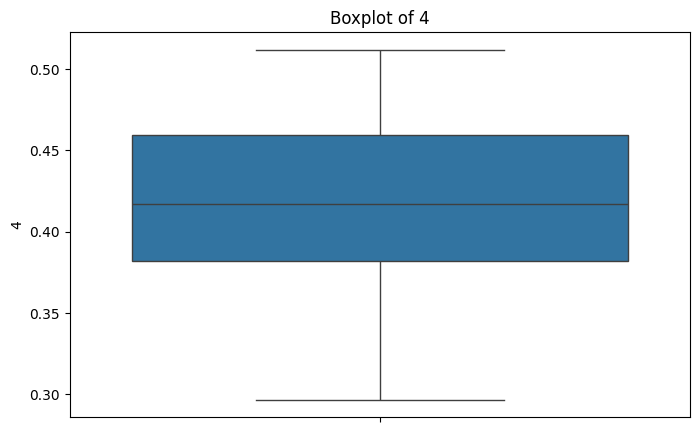


Data Distribution for column '5':
count    500.000000
mean       0.412432
std        0.044727
min        0.286860
25%        0.377157
50%        0.411872
75%        0.452198
max        0.501786
Name: 5, dtype: float64


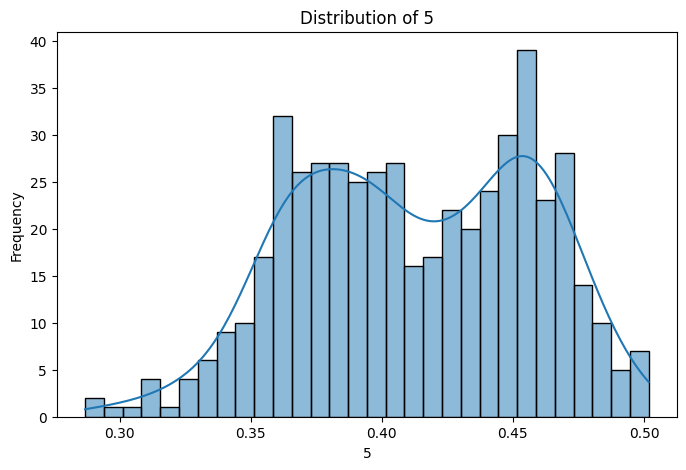

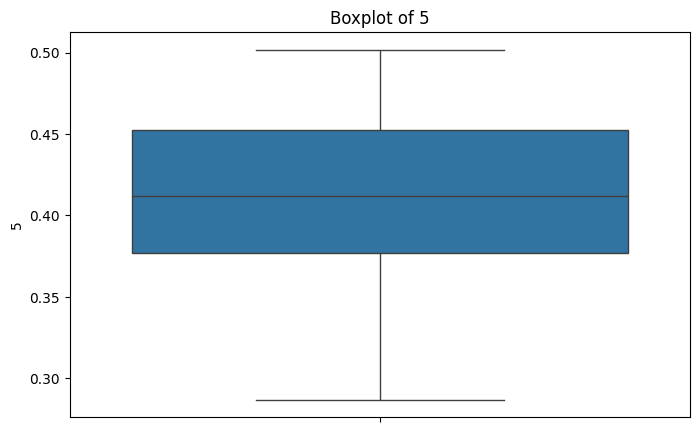


Data Distribution for column '6':
count    500.000000
mean       0.405868
std        0.044528
min        0.262876
25%        0.369620
50%        0.405443
75%        0.444384
max        0.504054
Name: 6, dtype: float64


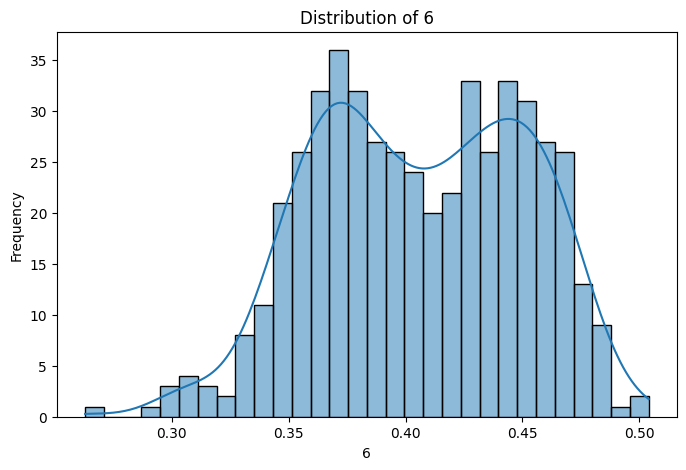

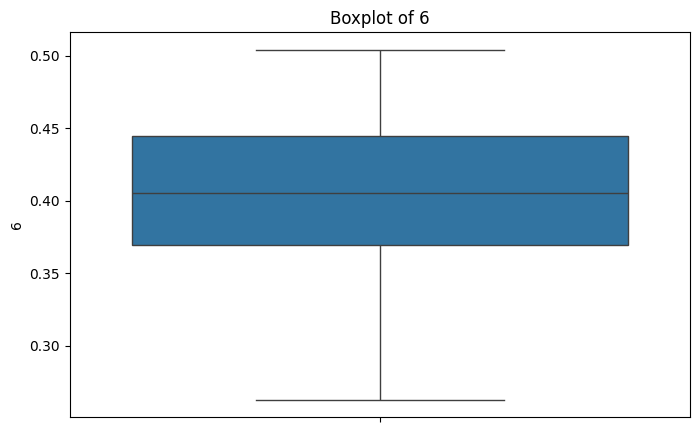


Data Distribution for column '7':
count    500.000000
mean       0.399815
std        0.043773
min        0.278523
25%        0.364823
50%        0.397917
75%        0.438728
max        0.490692
Name: 7, dtype: float64


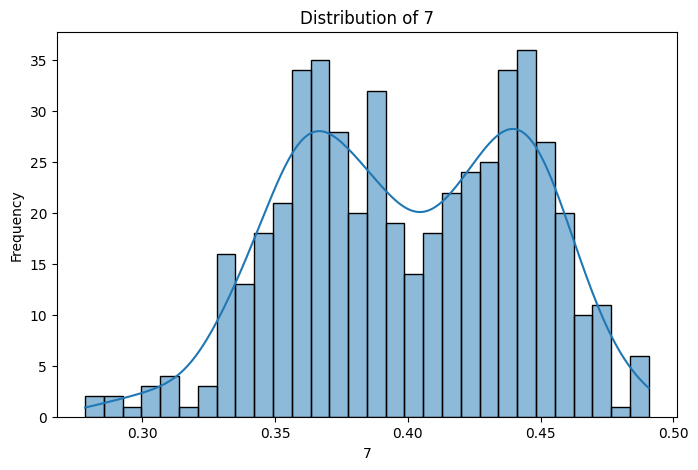

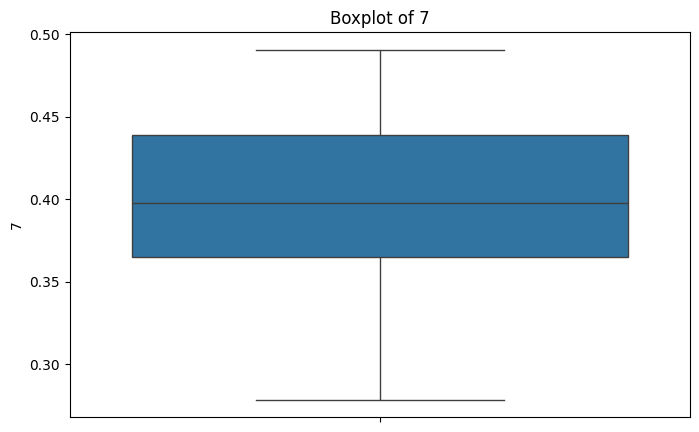


Data Distribution for column '8':
count    500.000000
mean       0.394038
std        0.043659
min        0.255529
25%        0.360634
50%        0.393803
75%        0.431165
max        0.489272
Name: 8, dtype: float64


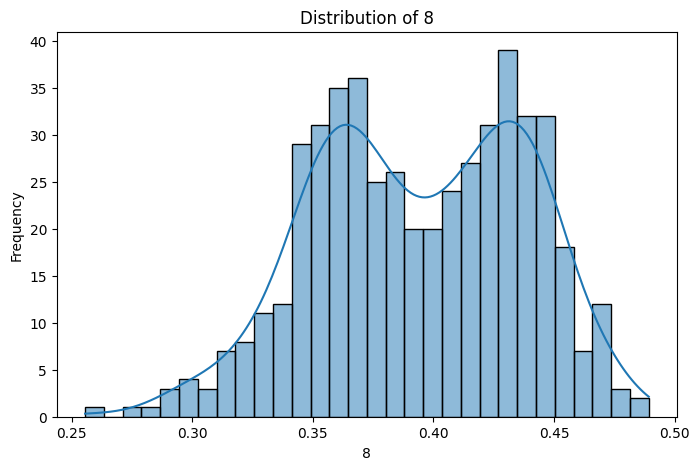

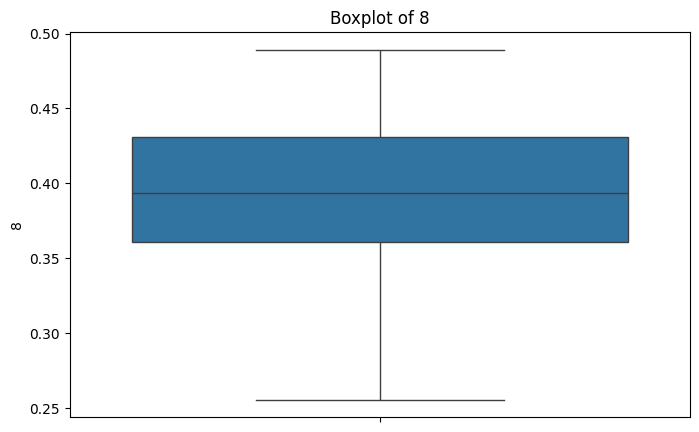

In [2]:
# Data distribution for columns excluding 'hsi_id'
for col in df.columns[:10]:
  if col != 'hsi_id':
    print(f"\nData Distribution for column '{col}':")
    print(df[col].describe())  # Summary statistics
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True)  # Histogram with KDE
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot to visualize outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Original dataset size: 500 samples
Cleaned dataset size (outliers removed): 464 samples
Samples removed: 36


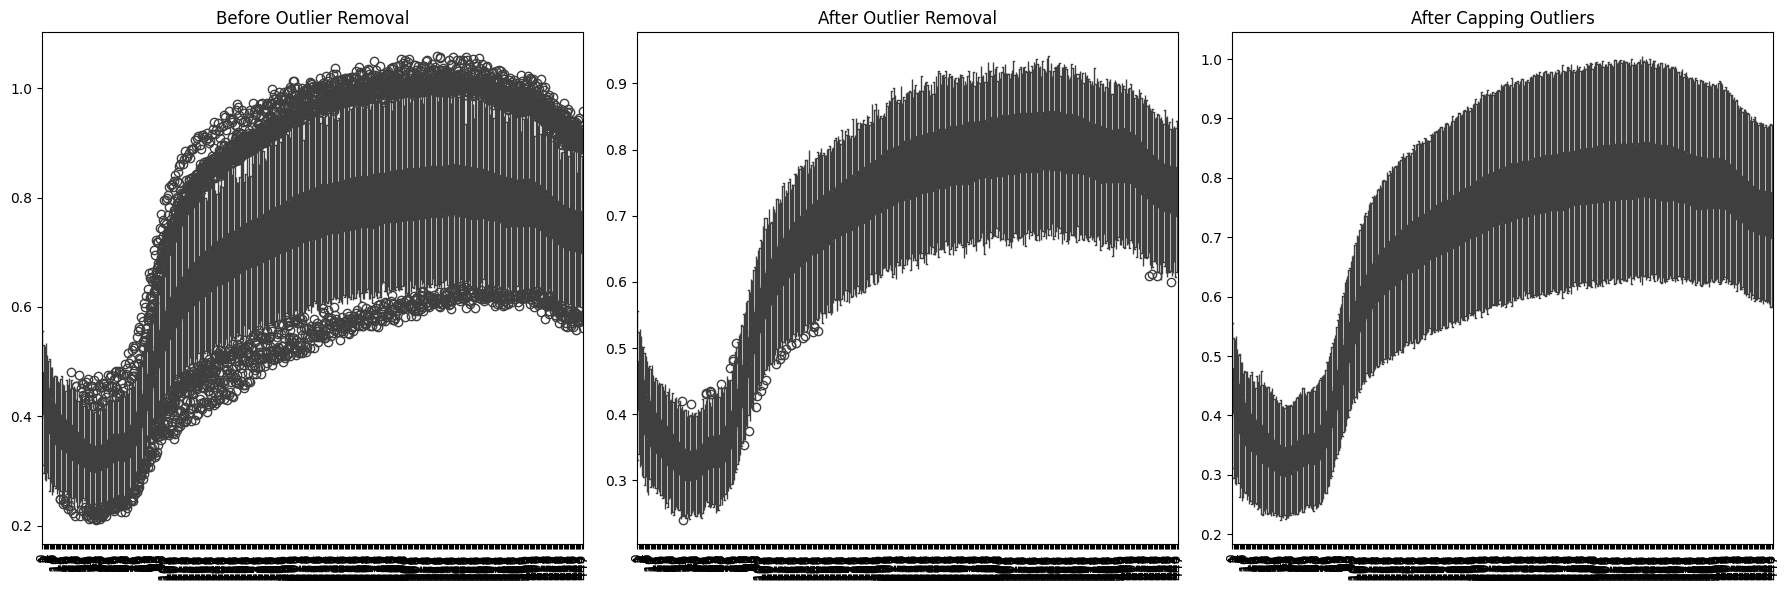

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to numeric
for col in df.columns[1:-1]:  # Excluding 'hsi_id' and target variable
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values before outlier removal
df.dropna(inplace=True)

# Compute IQR
Q1 = df.iloc[:, 1:-1].quantile(0.25)
Q3 = df.iloc[:, 1:-1].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Option 1: Remove outliers
mask = ~((df.iloc[:, 1:-1] < lower_bound) | (df.iloc[:, 1:-1] > upper_bound)).any(axis=1)
df_no_outliers = df[mask]

# Option 2: Cap outliers (Winsorization)
df_capped = df.copy()
df_capped.iloc[:, 1:-1] = np.where(df.iloc[:, 1:-1] < lower_bound, lower_bound, df.iloc[:, 1:-1])
df_capped.iloc[:, 1:-1] = np.where(df.iloc[:, 1:-1] > upper_bound, upper_bound, df_capped.iloc[:, 1:-1])

# Print data loss info
print(f"Original dataset size: {df.shape[0]} samples")
print(f"Cleaned dataset size (outliers removed): {df_no_outliers.shape[0]} samples")
print(f"Samples removed: {df.shape[0] - df_no_outliers.shape[0]}")

# Visualize before/after
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Before outlier removal
sns.boxplot(data=df.iloc[:, 1:-1], ax=axes[0])
axes[0].set_title("Before Outlier Removal")
axes[0].tick_params(axis='x', rotation=90)

# After outlier removal
sns.boxplot(data=df_no_outliers.iloc[:, 1:-1], ax=axes[1])
axes[1].set_title("After Outlier Removal")
axes[1].tick_params(axis='x', rotation=90)

# After capping
sns.boxplot(data=df_capped.iloc[:, 1:-1], ax=axes[2])
axes[2].set_title("After Capping Outliers")
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


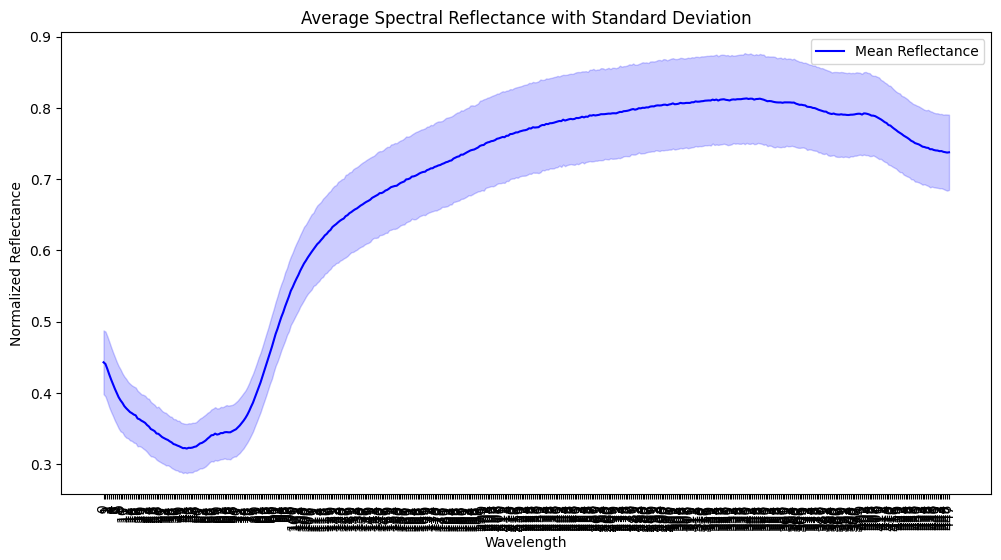

In [4]:
import numpy as np

mean_reflectance = df_capped.iloc[:, 1:-1].mean()
std_reflectance = df_capped.iloc[:, 1:-1].std()
wavelengths = df_capped.columns[1:-1]  # Extract column names as wavelengths
# Plot the average spectral reflectance
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, mean_reflectance, label="Mean Reflectance", color='b')
plt.fill_between(wavelengths, mean_reflectance - std_reflectance, mean_reflectance + std_reflectance, color='b', alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel("Wavelength")
plt.ylabel("Normalized Reflectance")
plt.title("Average Spectral Reflectance with Standard Deviation")
plt.legend()
plt.show()


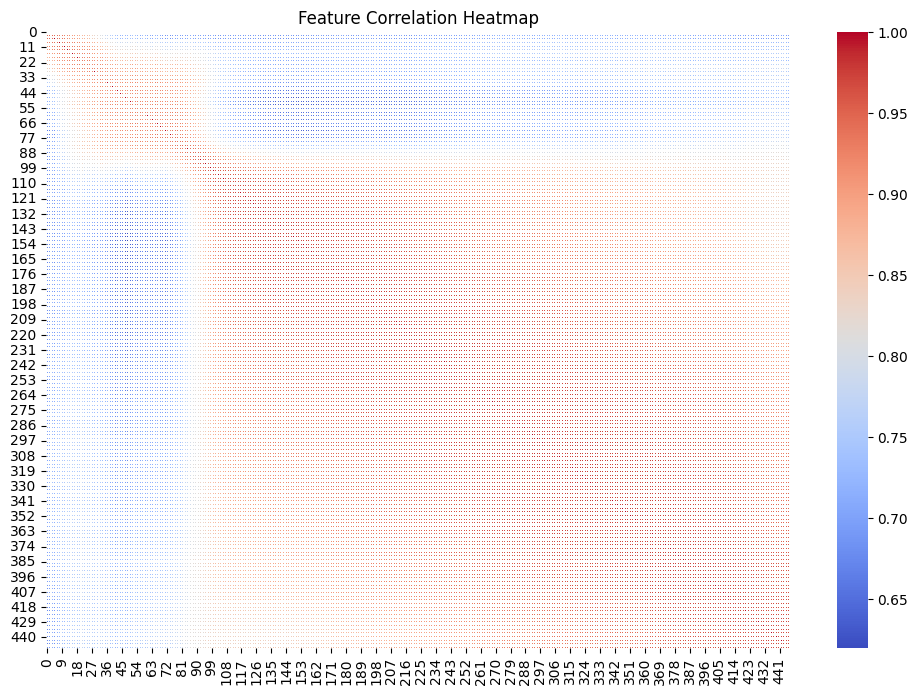

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_capped.iloc[:, 1:-1].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Results saved to pca_regression_results.csv


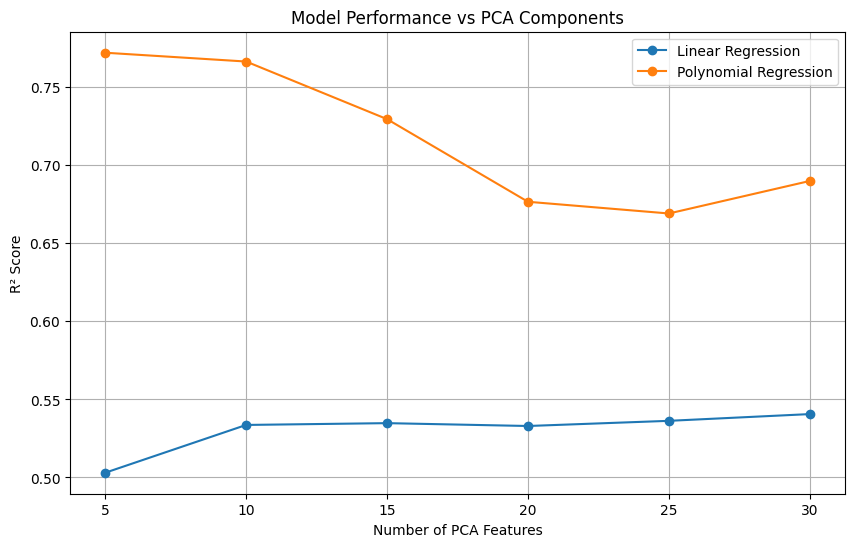

In [10]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract features and target variable
X = df_capped.iloc[:, 1:-1].values  # Spectral features
y = df_capped.iloc[:, -1].values    # Target (DON concentration)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature reduction settings
num_features = list(range(5, 31, 5))  # [5, 10, 15, ..., 30]
metrics = []

# Loop over different PCA dimensions
for n in num_features:
    # Apply PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Initialize models
    linear_model = LinearRegression()
    poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

    # Train Linear Regression
    linear_model.fit(X_train_pca, y_train)
    y_pred_linear = linear_model.predict(X_test_pca)

    # Train Polynomial Regression
    poly_model.fit(X_train_pca, y_train)
    y_pred_poly = poly_model.predict(X_test_pca)

    # Compute metrics
    for model_name, y_pred in zip(["Linear", "Polynomial"], [y_pred_linear, y_pred_poly]):
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        metrics.append({"Features": n, "Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convert results to DataFrame
metrics_df = pd.DataFrame(metrics)

# Save metrics for visualization
metrics_df.to_csv("pca_regression_results.csv", index=False)
print("Results saved to pca_regression_results.csv")

# Visualize Performance
plt.figure(figsize=(10, 6))
for model in ["Linear", "Polynomial"]:
    subset = metrics_df[metrics_df["Model"] == model]
    plt.plot(subset["Features"], subset["R²"], marker='o', label=f"{model} Regression")

plt.xlabel("Number of PCA Features")
plt.ylabel("R² Score")
plt.title("Model Performance vs PCA Components")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import joblib

# Find the best model based on R² score
best_model_row = metrics_df.loc[metrics_df["R²"].idxmax()]
best_n_features = best_model_row["Features"]
best_model_type = best_model_row["Model"]

print(f"Best Model: {best_model_type} Regression with {best_n_features} PCA components")

# Retrain the best model
pca = PCA(n_components=int(best_n_features))
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

if best_model_type == "Linear":
    best_model = LinearRegression()
elif best_model_type == "Polynomial":
    best_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

best_model.fit(X_train_pca, y_train)

# Save the PCA and the best model
joblib.dump(pca, "best_pca_model.pkl")
joblib.dump(best_model, "best_regression_model.pkl")

print("Best model and PCA transformer saved successfully!")


Best Model: Polynomial Regression with 5 PCA components
Best model and PCA transformer saved successfully!


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Features: 5, Model: RandomForest, Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, MAE: 3743.07, RMSE: 13017.94, R²: 0.3938
Features: 5, Model: XGBoost, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}, MAE: 3045.96, RMSE: 12374.11, R²: 0.4522
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Features: 10, Model: RandomForest, Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, MAE: 3867.96, RMSE: 12613.18, R²: 0.4309
Features: 10, Model: XGBoost, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}, MAE: 2999.33, RMSE: 11734.36, R²: 0.5074
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 18 candidates, totalling 54

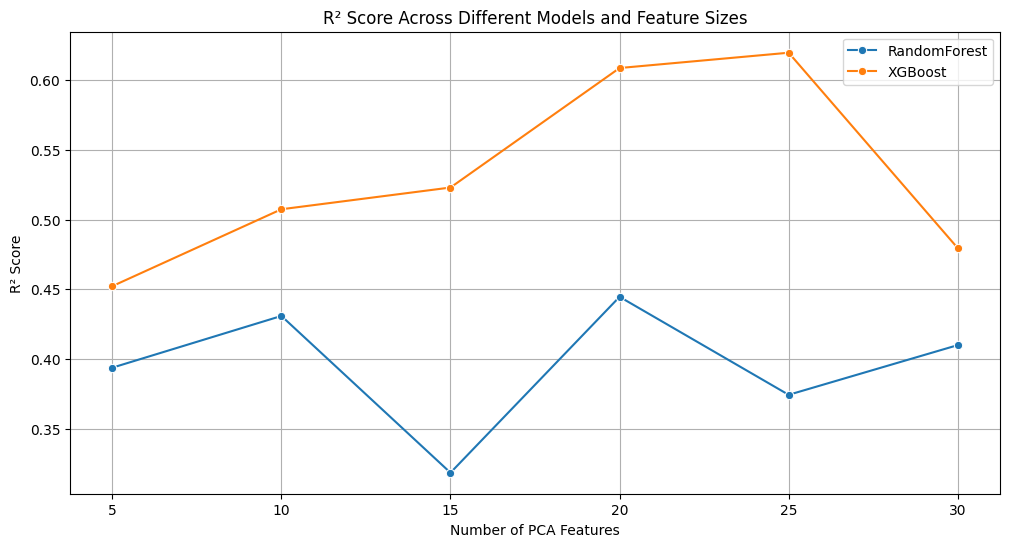

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load the dataset (Assume df_no_outliers is preprocessed and ready)
X = df_capped.iloc[:, 1:-1].values  # Spectral features
y = df_capped.iloc[:, -1].values    # Target (DON concentration)

# Define feature set sizes
feature_sizes = list(range(5, 35, 5))

# Define hyperparameter grids
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# Store results
results = []
best_model = None
best_pca = None
best_score = -np.inf  # Start with the lowest possible R²

for n_features in feature_sizes:
    # Apply PCA
    pca = PCA(n_components=n_features)
    X_pca = pca.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Hyperparameter tuning for RandomForest
    rf = RandomForestRegressor(random_state=42)
    rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
    rf_grid.fit(X_train, y_train)
    best_rf = rf_grid.best_estimator_

    # Train and evaluate RandomForest
    y_pred_rf = best_rf.predict(X_test)
    rf_mae = mean_absolute_error(y_test, y_pred_rf)
    rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    rf_r2 = r2_score(y_test, y_pred_rf)

    results.append([n_features, "RandomForest", rf_mae, rf_rmse, rf_r2])

    # Check if this is the best model
    if rf_r2 > best_score:
        best_score = rf_r2
        best_model = best_rf
        best_pca = pca
        best_model_type = "RandomForest"
        best_n_features = n_features

    # Hyperparameter tuning for XGBoost
    xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
    xgb_grid.fit(X_train, y_train)
    best_xgb = xgb_grid.best_estimator_

    # Train and evaluate XGBoost
    y_pred_xgb = best_xgb.predict(X_test)
    xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
    xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    xgb_r2 = r2_score(y_test, y_pred_xgb)

    results.append([n_features, "XGBoost", xgb_mae, xgb_rmse, xgb_r2])

    # Check if this is the best model
    if xgb_r2 > best_score:
        best_score = xgb_r2
        best_model = best_xgb
        best_pca = pca
        best_model_type = "XGBoost"
        best_n_features = n_features

    # Print performance
    print(f"Features: {n_features}, Model: RandomForest, Best Params: {rf_grid.best_params_}, MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.4f}")
    print(f"Features: {n_features}, Model: XGBoost, Best Params: {xgb_grid.best_params_}, MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}, R²: {xgb_r2:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Features", "Model", "MAE", "RMSE", "R²"])

# Save results
results_df.to_csv("model_performance_tuned.csv", index=False)

# Save the best model
joblib.dump(best_pca, "best_pca_model.pkl")
joblib.dump(best_model, "best_regression_model.pkl")
print(f"Best Model: {best_model_type} with {best_n_features} PCA components (R²: {best_score:.4f}) saved successfully!")

# Plot Features vs R² Score
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x="Features", y="R²", hue="Model", marker="o")
plt.title("R² Score Across Different Models and Feature Sizes")
plt.xlabel("Number of PCA Features")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
# Load the dataset (Assume df_no_outliers is preprocessed and ready)
X = df_capped.iloc[:, 1:-1].values  # Spectral features
y = df_capped.iloc[:, -1].values    # Target (DON concentration)

# Apply PCA with all components
pca = PCA(n_components=X.shape[1])  # Use all features
X_pca = pca.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [83]:
pca = PCA(n_components=448)  # Set n_components to 400 or any smaller number
pca.fit(X)  # Fit PCA on the training data

# Save the PCA model
import joblib
joblib.dump(pca, 'pca_model_best.pkl')


['pca_model_best.pkl']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 120139280.0000 - mae: 3046.0371 - val_loss: 299003712.0000 - val_mae: 4412.7104
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 105668544.0000 - mae: 2726.2075 - val_loss: 298990944.0000 - val_mae: 4411.8218
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 161600816.0000 - mae: 3156.1738 - val_loss: 298940448.0000 - val_mae: 4408.6768
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 114442024.0000 - mae: 2654.0010 - val_loss: 298781920.0000 - val_mae: 4399.7637
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 179736272.0000 - mae: 3588.1538 - val_loss: 298395456.0000 - val_mae: 4379.5820
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 268124016.0000 - mae: 4081.7493 - val_loss: 297616160.0000 - val_mae: 4340.2661
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 212952224.0000 - mae: 3554.1958 - val_loss: 295931072.0000 - val_mae: 4276.3906
Epoch 8/100
25/25 ━━━━━━━━

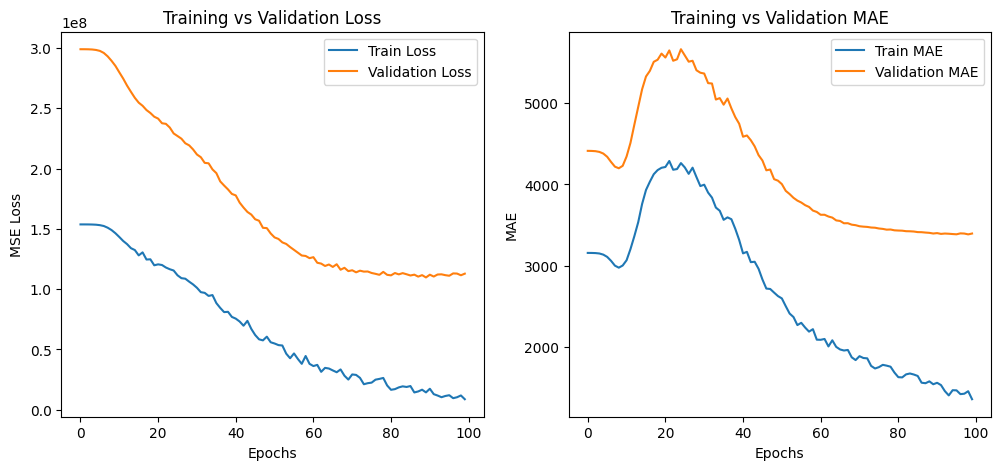

In [10]:
# Define Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output layer (no activation function)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict on test data
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Neural Network Performance:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training vs Validation MAE')

plt.show()


In [ ]:
# Save the model to a file
model.save('/Users/srinivaskalyan/Downloads/ImageAI/don_concentration_predictor.h5')
print("Model saved successfully!")

Model saved successfully!


In [11]:
# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Neural Network Performance:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")


Neural Network Performance:
MAE: 3397.20, RMSE: 10624.91, R²: 0.5962


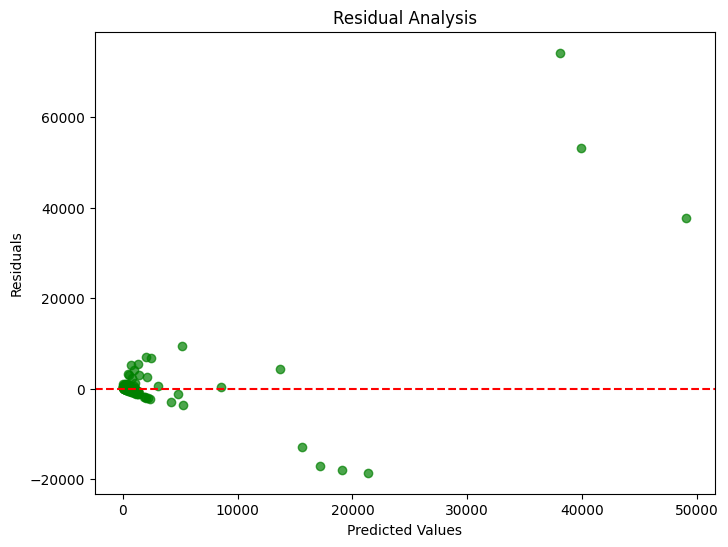

In [12]:
# Flatten y_pred to ensure it has the same shape as y_test
y_pred = y_pred.flatten()

# Now calculate residuals
residuals = y_test - y_pred

# Scatter plot for residuals analysis
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


In [ ]:
import joblib
import numpy as np

# Step 1: Load the trained PCA model
pca = joblib.load('/Users/srinivaskalyan/Downloads/ImageAI/pca_model_best.pkl')

# Step 2: Example new data (500 features)
new_spectrum = np.random.rand(500)  # Example: Replace with your actual new data

# Step 3: Apply PCA to reduce the features to 448
if new_spectrum.shape[0] > 448:
    new_spectrum = new_spectrum[:448]  # Truncate the input to 448 features if it's larger
transformed_spectrum = pca.transform(new_spectrum.reshape(1, -1))

# Step 4: Make prediction using your neural network model

prediction = model.predict(transformed_spectrum)

# Convert prediction to a Python float (if necessary)
prediction_value = float(prediction[0][0])

# Output the result
print(f"Prediction: {prediction_value}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction: 41650.22265625
